## Sprawozdanie z Uczenia Maszynowego
## Jakub Szczypek - lab 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

**Ex.1 Use the head and describe function to examine the data and display few columns**

In [2]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


**Ex. 2. Extract data from pandas structure to new variables of ndarray type**

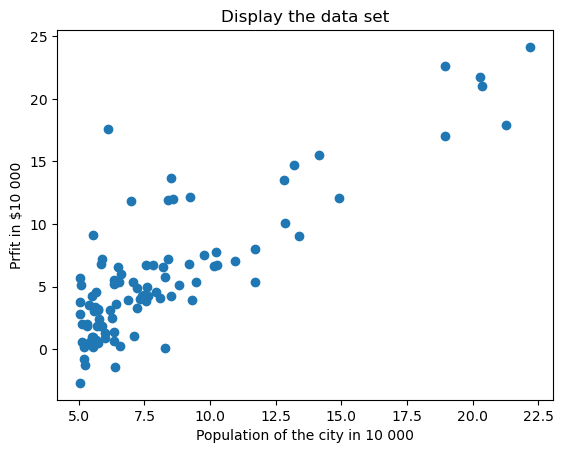

In [4]:
x = data.values[:, 0]
y = data.values[:, 1]
plt.scatter(x, y)
plt.ylabel("Prfit in $10 000")
plt.xlabel("Population of the city in 10 000")
plt.title("Display the data set")
plt.show()

**Ex. 3. In order to make the cost function work (intercept value theta0 has to be multiplied by 1) we need to insert a column of ones at the top of x**

**Ex. 4. We need to separate our data into independent variables X and our dependent variable y. We also need to initialise parameter theta**

In [5]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

**Ex. 5 The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on X, y and parameter theta**

**Ex. 6 Test the function**

In [6]:
def computeCost(X, y, theta):
    # 2-3 code lines as series of matrix operation
    diff_sg = (theta.T@X - y)**2
    return diff_sg.sum()/X.shape[1]/2

print(computeCost(X, y, theta))

32.072733877455676


**Ex. 7 Implementation the gradient decent algortihm**

In [7]:
alpha = 0.01
it = 1000

def h(x,theta):
    return theta.T@x
def computeCost ( X , y , theta ) :
    return ((h(X,theta)-y)**2).sum()/X.shape[1]/2
def simple_gradient(X, y, theta, alpha, it):
    cost=[]
    for i in range(it):
        theta = theta - alpha*((h(X,theta)-y)@X.T).T/X.shape[1]
        cost.append(computeCost(X,y,theta))
    return theta, cost

**Ex. 8 Please calculate the optimal parameters for the dataset.**

**Ex. 9 Please calculate the cost function for the given θ (Ex.8).**

**Ex. 10 Plot the regression function and our dataset.**

In [8]:
theta, cost = simple_gradient(X, y, theta, alpha, it)
print(theta)

[[-3.24140214]
 [ 1.1272942 ]]


In [9]:
print(cost[-1])

4.515955503078913


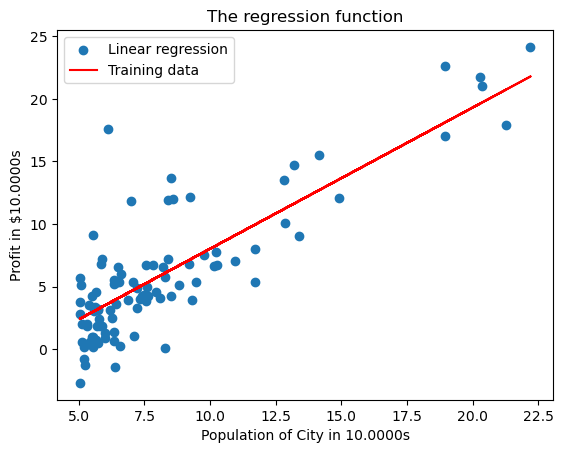

In [10]:
plt.scatter(x, y, label = "Training data")
plt.plot(x, x*theta[1] + theta[0], 'r', label = "Linear regression")
plt.title("The regression function")
plt.legend(['Linear regression','Training data'])
plt.xlabel("Population of City in 10.0000s")
plt.ylabel("Profit in $10.0000s")
plt.show()

**Ex. 11 Plot the relationship between the cost function and number of iterations.**

In [11]:
print(cost)
print(it)

[6.737190464870007, 5.9315935686049555, 5.901154707081388, 5.895228586444221, 5.8900949431173295, 5.885004158443647, 5.879932480491418, 5.874879094762575, 5.869843911806385, 5.8648268653129305, 5.859827889932181, 5.85484692057229, 5.849883892376587, 5.844938740722034, 5.840011401218361, 5.835101809707226, 5.830209902261388, 5.825335615183863, 5.820478885007099, 5.815639648492154, 5.810817842627869, 5.806013404630044, 5.801226271940628, 5.7964563822269, 5.7917036733806535, 5.7869680835173956, 5.782249550975539, 5.777548014315596, 5.772863412319381, 5.768195683989212, 5.76354476854712, 5.758910605434047, 5.754293134309077, 5.749692295048629, 5.745108027745684, 5.740540272709012, 5.735988970462381, 5.731454061743792, 5.726935487504702, 5.722433188909257, 5.717947107333529, 5.713477184364749, 5.709023361800549, 5.704585581648199, 5.700163786123857, 5.695757917651815, 5.691367918863751, 5.68699373259798, 5.682635301898707, 5.678292570015292, 5.673965480401506, 5.669653976714796, 5.665358002

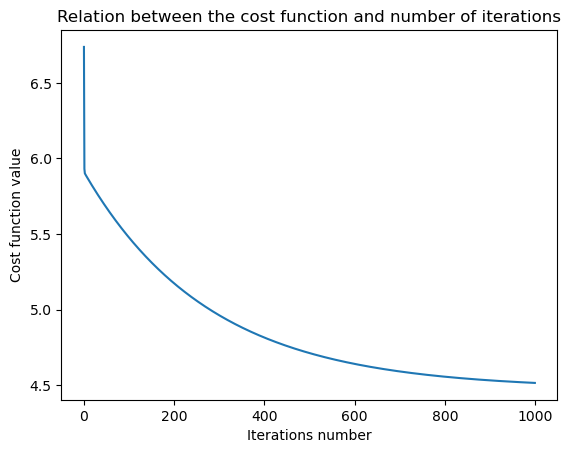

In [12]:
iterations = range(0, 1000)

plt.plot(iterations, cost)
plt.title("Relation between the cost function and number of iterations")
plt.xlabel("Iterations number")
plt.ylabel("Cost function value")
plt.show()

## Linear regression with multiple variables

In [13]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


**Ex. 1**

In [14]:
x0 = data2.values[:,0]
x1 = data2.values[:,1]
y2 = data2.values[:,2]

x1 = (x1-x1.mean())/np.std(x1)
x0 = (x0-x0.mean())/np.std(x0)
y2 = (y2-y2.mean())/np.std(y2)

**Ex. 2**

In [15]:
X2 = np.stack([np.ones(x0.shape, dtype=np.float32), x0, x1], axis=0)
y2.shape = [1, y2.shape[0]]
theta2 = np.zeros((X2.shape[0], 1), dtype=np.float32)

In [16]:
theta, cost = simple_gradient(X2,y2,theta2,0.01,1000)
print(f'Theta: {theta}')
computeCost(X2,y2,theta)

Theta: [[-8.28238187e-17]
 [ 8.79065699e-01]
 [-4.74786542e-02]]


0.13354178879075576

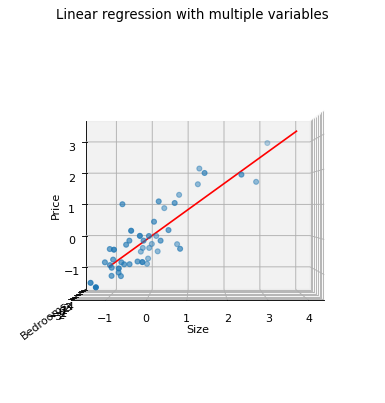

In [17]:
c = theta[0,0]
b = theta[1,0]
a = theta[2,0]
x0Grad = np.linspace(-1, 4, y2.size, endpoint=True)
x1Grad = np.linspace(-1, 4, y2.size, endpoint=True)
yGradient = (a*x0Grad + b*x1Grad + c)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x0, x1, y2)
ax.plot(x0Grad, x1Grad, yGradient,'r')
ax.set_title('Linear regression with multiple variables')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.view_init(0,-90)
plt.show()

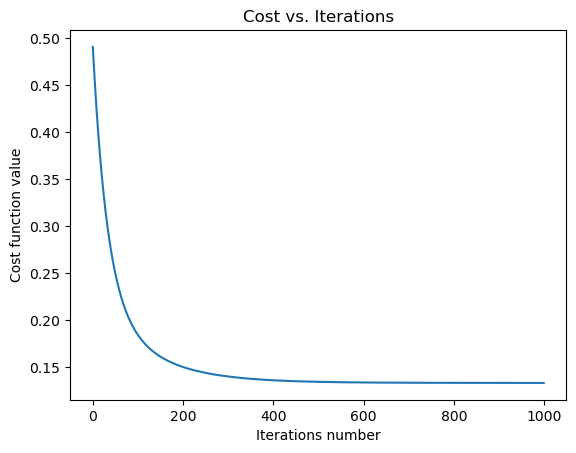

In [18]:
x_cost= np.arange(0, len(cost), 1)
plt.plot(x_cost, cost)
plt.title("Cost vs. Iterations")
plt.xlabel("Iterations number")
plt.ylabel("Cost function value")
plt.show()

## Linear regression - Python packages

In [19]:
from sklearn import datasets, linear_model

# Data import

from sklearn.datasets import load_iris
iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
# Normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)

df_normalized = pd.DataFrame(data=normalized_data, columns=iris.feature_names)
df_normalized

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [21]:
# Split into train and test sets (70-30%)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_normalized, iris.target, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, Y_train.shape,Y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [22]:
# Creating an object 

regr = linear_model.LinearRegression()

In [23]:
# Learning model on training data

regr.fit(X_train, Y_train)

LinearRegression()

In [24]:
# Predicting values using test data

Y_predicted = regr.predict(X_test)

In [25]:
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-0.08874883 -0.025391    0.46581225  0.40210087]


In [26]:
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Residual sum of squares: 0.03866591237825786
